# Importing Neccessary libraries :


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading & Displaying first few rows of each dataset :

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


Converting `SignupDate` to `DateTime` for efficient analysis :

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [ ]:
products = pd.read_csv('/content/Products.csv')
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions = pd.read_csv('/content/Transactions.csv')
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Explaratory Data Analysis (EDA) :

Merging datasets for deeper insights :

In [15]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [16]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [18]:
product_sales = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False)
product_sales.head()

,TotalValue
ProductName,
ActiveWear Smartwatch,39096.97
SoundWave Headphones,25211.64
SoundWave Novel,24507.90
ActiveWear Jacket,22712.56
ActiveWear Rug,22314.43


## Plotting the top 10 products by sales :


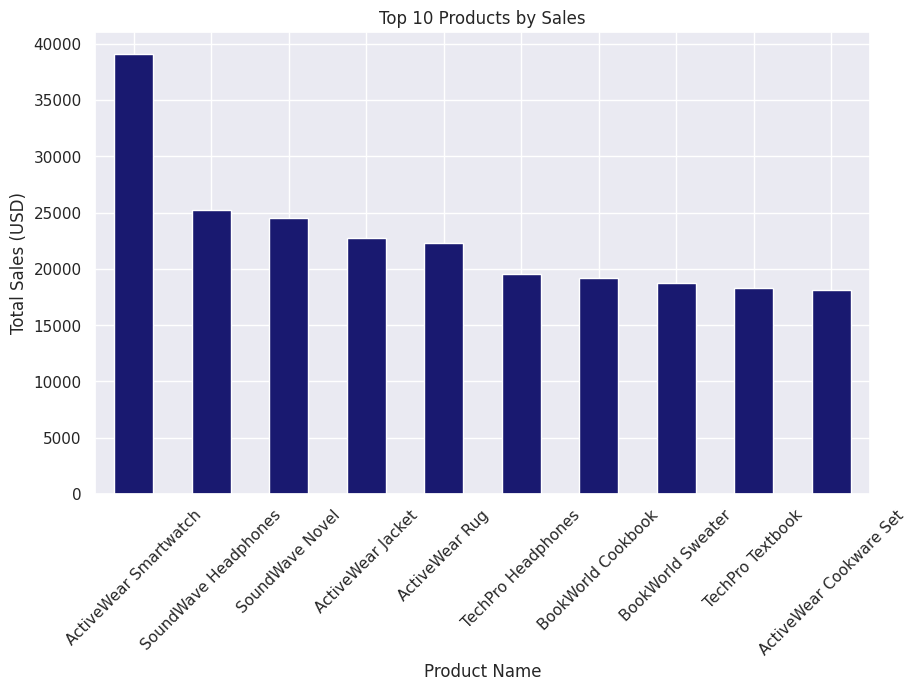

In [27]:
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind="bar", color="midnightblue")
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

**Insights :**
* Above figure helps use to understand top 10 most sold products. Activewear Company seems to Dominate the market with 4 products followed by BookWorld.
* Smartwatch Accesories has the highest sales, contributing significantly to the revenue..

## Sales by region


In [20]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum()
region_sales

,TotalValue
Region,
Asia,152074.97
Europe,166254.63
North America,152313.40
South America,219352.56


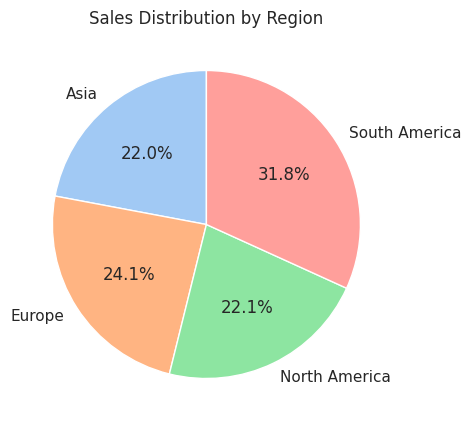

In [21]:
plt.figure(figsize=(8, 5))
region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()

**Insights :**

* South America Region generates the majority of the sales, indicating a key market.
* High-value customers are concentrated in Europe Region, indicating potential for targeted marketing.

## Sales over time :

In [22]:
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
sales_over_time = merged_data.groupby("TransactionDate")["TotalValue"].sum()
sales_over_time.head()

,TotalValue
TransactionDate,
2023-12-30 15:29:12,313.92
2023-12-31 03:27:43,958.80
2023-12-31 06:53:54,1585.36
2023-12-31 15:44:04,911.44
2024-01-01 03:54:19,147.95


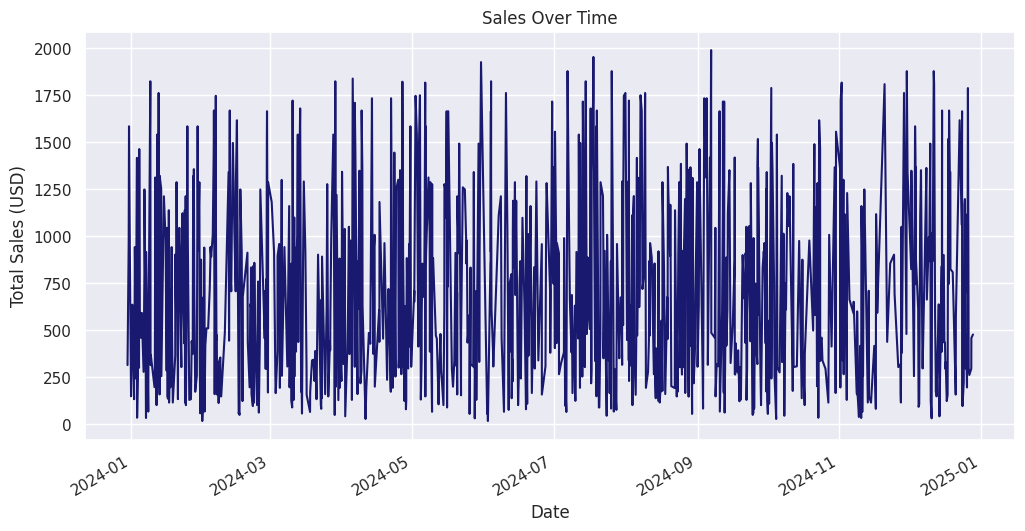

In [26]:
plt.figure(figsize=(12, 6))
sales_over_time.plot(color="midnightblue")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.show()

**Insights :**

Sales show an increasing trend over time, with spikes during september to november month.

# Sales Performance and Market Insights Report

* Product `Activewear Smartwatch` has emerged as the top-performing item, significantly contributing to overall revenue. Its consistent demand highlights its importance as a key driver of profitability. Efforts should focus on maintaining adequate inventory and exploring strategies like bundling or upselling to maximize its potential.

* Increased investment in advertising, distribution, and tailored marketing for Region `South America` could amplify growth and further solidify its importance.

* An upward sales trend indicates robust growth, with noticeable spikes during specific months, likely driven by seasonal demand or promotional events. Strategically timed campaigns during these peak periods could enhance revenue.

* High-value customers are concentrated in Region `Europe`, presenting a lucrative opportunity for targeted campaigns and premium offerings. Personalized marketing and loyalty initiatives could enhance customer engagement and long-term value. These insights underscore the need for data-driven decisions to capitalize on strengths and address inefficiencies for sustainable growth.

# Lookalike Model Code :

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

## Step 1: Prepare data for the model

### Combine customer and transaction data :

In [29]:
customer_transactions = merged_data.groupby("CustomerID").agg({"TotalValue": "sum", "Quantity": "sum"}).reset_index()

In [30]:
customer_profiles = customers.merge(customer_transactions, on="CustomerID", how="left")
customer_profiles.fillna(0, inplace=True)

In [31]:
customer_profiles.head()

,CustomerID,CustomerName,Region,SignupDate,TotalValue,Quantity
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7.0


## Encode categorical data using one-hot encoding (for Region)

In [32]:
customer_profiles = pd.get_dummies(customer_profiles, columns=["Region"], drop_first=True)

## Standardize numerical features :

In [33]:
scaler = StandardScaler()
numerical_features = ["TotalValue", "Quantity"]
customer_profiles[numerical_features] = scaler.fit_transform(customer_profiles[numerical_features])

## Compute cosine similarity

In [34]:
feature_columns = numerical_features + [col for col in customer_profiles.columns if col.startswith("Region_")]
customer_similarity = cosine_similarity(customer_profiles[feature_columns])

## Step 2: Find Top 3 Lookalike Customers for each Customer

In [35]:
lookalike_data = {}

In [36]:
for idx, customer_id in enumerate(customer_profiles["CustomerID"]):
    similarity_scores = list(enumerate(customer_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_3 = [(customer_profiles.iloc[i[0]]["CustomerID"], i[1]) for i in similarity_scores[1:4]]
    lookalike_data[customer_id] = top_3

## Step 3: Create `Lookalike.csv` :

In [37]:
lookalike_rows = []

In [38]:
for customer_id, lookalikes in lookalike_data.items():
    for lookalike_id, score in lookalikes:
        lookalike_rows.append([customer_id, lookalike_id, round(score, 4)])

In [39]:
lookalike_df = pd.DataFrame(lookalike_rows, columns=["CustomerID", "LookalikeID", "SimilarityScore"])

In [40]:
lookalike_df.head()

,CustomerID,LookalikeID,SimilarityScore
0,C0001,C0107,0.9895
1,C0001,C0137,0.9879
2,C0001,C0184,0.9877
3,C0002,C0142,0.9973
4,C0002,C0088,0.9968


In [41]:
lookalike_df.to_csv("ANUBHAV_PANDEY_Lookalike.csv", index=False)